<a href="https://colab.research.google.com/github/ydev365/statistical_analysis/blob/main/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차원 데이터의 정리

## 데이터 중심의 지표

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('display.float_format', '{:.3f}'.format)

In [54]:
df = pd.read_csv('/content/drive/MyDrive/대학교통계적분석/source/python_stat_sample-master/data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [55]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [56]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [57]:
sum(scores) / len(scores)

np.float64(55.0)

In [58]:
np.mean(scores)

np.float64(55.0)

In [59]:
scores_df.mean()

,0
score,55.000


### 중앙값

In [60]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [61]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

np.float64(56.5)

In [62]:
np.median(scores)

np.float64(56.5)

In [63]:
scores_df.median()

,0
score,56.500


### 최빈값

In [64]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

,0
0,1


In [65]:
pd.Series([1, 2, 3, 4, 5]).mode()

,0
0,1
1,2
2,3
3,4
4,5


## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차

In [66]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [67]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [68]:
np.mean(deviation)

np.float64(0.0)

In [69]:
np.mean(another_deviation)

np.float64(0.0)

In [70]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.000
B,69,14.000
C,56,1.000
D,41,-14.000
E,57,2.000
F,48,-7.000
G,65,10.000
H,49,-6.000
I,65,10.000


In [71]:
summary_df.mean()

,0
score,55.000
deviation,0.000


#### 분산

In [72]:
np.mean(deviation ** 2)

np.float64(86.0)

In [73]:
np.var(scores)

np.float64(86.0)

In [74]:
scores_df.var()

,0
score,95.556


In [75]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.000,169.000
B,69,14.000,196.000
C,56,1.000,1.000
D,41,-14.000,196.000
E,57,2.000,4.000
F,48,-7.000,49.000
G,65,10.000,100.000
H,49,-6.000,36.000
I,65,10.000,100.000


In [76]:
summary_df.mean()

,0
score,55.000
deviation,0.000
square of deviation,86.000


#### 표준편차

In [77]:
np.sqrt(np.var(scores, ddof=0))

np.float64(9.273618495495704)

In [78]:
np.std(scores, ddof=0)

np.float64(9.273618495495704)

### 범위와 4분위수 범위

#### 범위

In [79]:
np.max(scores) - np.min(scores)

np.int64(28)

In [80]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

np.float64(15.0)

#### 4분위수 범위

### 데이터의 지표 정리

In [81]:
pd.Series(scores).describe()

,0
count,10.000
mean,55.000
std,9.775
min,41.000
25%,48.250
50%,56.500
75%,63.250
max,69.000


## 데이터의 정규화

### 표준화

In [82]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [83]:
np.mean(z), np.std(z, ddof=0)

(np.float64(-1.6653345369377347e-17), np.float64(0.9999999999999999))

### 편차값

In [84]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [85]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 데이터의 시각화

In [86]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

,0
count,50.000
mean,58.380
std,9.800
min,37.000
25%,54.000
50%,57.500
75%,65.000
max,79.000


### 도수분포표

In [99]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [100]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [89]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [90]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [91]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [92]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.000,0.000
10~20,15,0,0.000,0.000
20~30,25,0,0.000,0.000
30~40,35,2,0.040,0.040
40~50,45,8,0.160,0.200
50~60,55,16,0.320,0.520
60~70,65,18,0.360,0.880
70~80,75,6,0.120,1.000
80~90,85,0,0.000,1.000


#### 최빈값 재검토

In [93]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

np.int64(65)

### 히스토그램

In [94]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

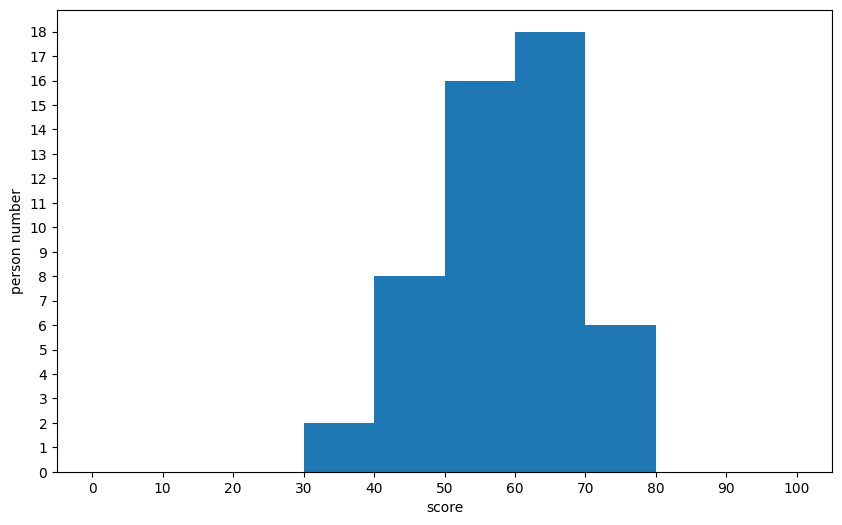

In [95]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

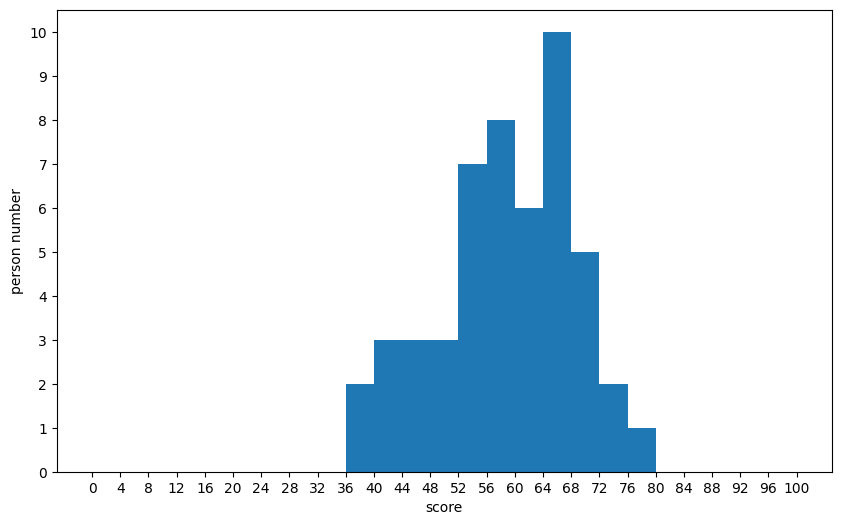

In [96]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

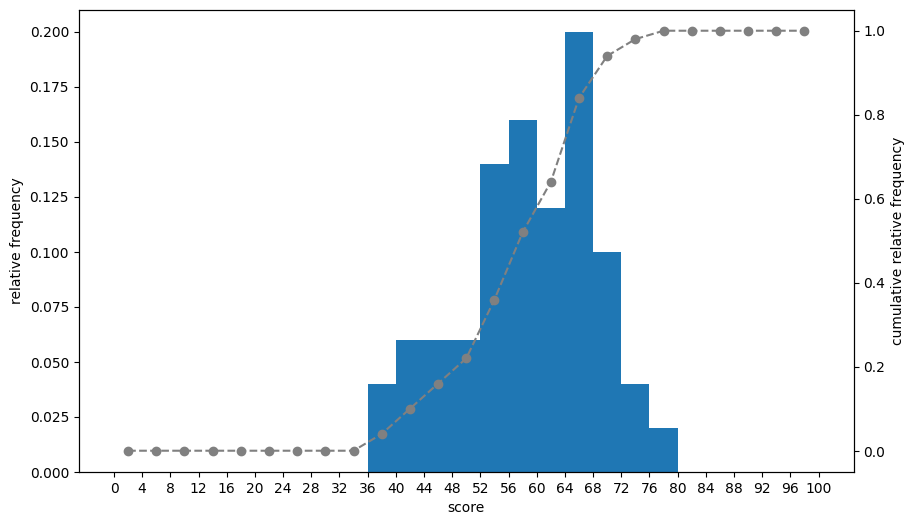

In [97]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

### 상자 그림

/tmp/ipython-input-1381989562.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores, labels=['english'])


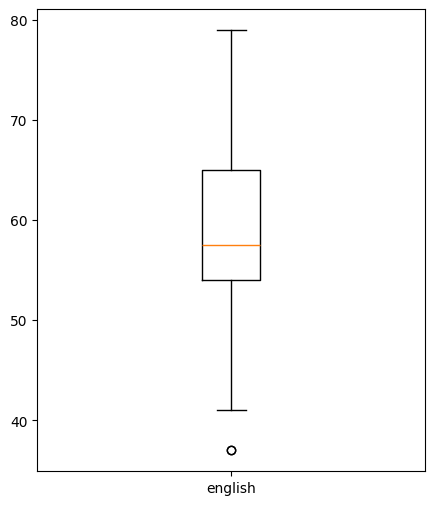

In [98]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()